# Overview

In [1]:
# importing the datasets
import pandas as pd

# the training data
df_titanic = pd.read_csv('titanic/train.csv')
# The test data
test_data = pd.read_csv('titanic/test.csv')

In [2]:
# getting an overview over the training data
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'Survived' is the response variate.

Deciding on relevant features:df_titanic
- 'Pclass':passengers in higher class are perhaps located closer to the upper decks
- 'Sex': men and women may behave differently in emergency situations
- 'Age': age may be a determining factor when trying to survive in cold water
- 'SibSp': preoccupation with helping siblings our spouses may influence chance of survival
- 'Parch': preoccupation with helping parents our children may influence chance of survival
- 'Ticket': purchasing behaviour may be linked to survival chances
- 'Fare': most likely correlated to Pclass, but remains in here for same reason
- 'Cabin': cabin numbers may be distributed in a certain way over the ship
- 'Embarked': may be correlated to cabin numbers

We drop  'Name' and 'PassengerId' and 'Ticket' as useless feature.

In [3]:
# dropping  'Name' and 'PassengerId' as useless features

df_titanic1 = df_titanic.drop(columns=['Name', 'PassengerId', 'Ticket'])
test_data1 = test_data.drop(columns=['Name', 'PassengerId', 'Ticket'])

We need to encode 'Sex', 'Cabin' and 'Embarked of the passengers

The variable 'cabin' contains information about the decks that passengers were accomodated in.
Deck A is highest up in the ship, while deck F ist the lowest passenger deck. <br>
The 'Tank' deck, with letter 'T' sits below the passenger decks in the ship.<br>
We will drop the information about which specific room the passengers were accomodated, but will maintain the deck information.<br>
Unfortunally, there is cabin information only for 204 of 891 passengers available.

In [4]:
# stripping away the cabin number
# but maintaining the deck name
df_titanic1['Cabin'] = df_titanic1['Cabin'].str.slice(stop=1)

In [5]:
# encoding nominal and categorical features
df_titanic2 = pd.get_dummies(df_titanic1[['Sex', 'Cabin', 'Embarked']], drop_first=True)

In [6]:
df_titanic2.head()

,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S
0,1,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,1


In [7]:
# merging the enconded frame with the other features
df_titanic = df_titanic1.join(df_titanic2, how='outer')

In [8]:
# selecting the columns that are needed
df_titanic = df_titanic[['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_male',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_T',
 'Embarked_Q',
 'Embarked_S']]

In [9]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Cabin_B     891 non-null    uint8  
 8   Cabin_C     891 non-null    uint8  
 9   Cabin_D     891 non-null    uint8  
 10  Cabin_E     891 non-null    uint8  
 11  Cabin_F     891 non-null    uint8  
 12  Cabin_G     891 non-null    uint8  
 13  Cabin_T     891 non-null    uint8  
 14  Embarked_Q  891 non-null    uint8  
 15  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(10)
memory usage: 89.7 KB


## Removing the 'Age' Nan rows from the training set

We drop about 20% of the training data, because they contain NaN values

In [10]:
# dropping the rows that contain NaN values, 
df_titanic = df_titanic.dropna()#axis=0, how='any', thresh=None, subset=None, inplace=False)[source]

In [11]:
# partition the dataset into separate test and training datasets randomly
from sklearn.model_selection import train_test_split

# assign Numpy array representation of feature columns to variable X
# and assign Numpy array representation of class labels of first column to variable y
X, y = df_titanic.iloc[:, 1:].values, df_titanic.iloc[:, 0].values 

# encoding the class labels (good practice)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3,  # set to 0.3 for 30% of examples to test, 70% to train 
                     random_state=0, 
                     stratify=y) # ensuring that both test and training dataset have same class proportions as orignal dataset

Standardization turns out to not be useful here. It may also be left out.

In [12]:
# Standardization 
# center the feature columns to mean 0 with standard deviation 1 > standard normal distribution
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [13]:
# # Standardization of features is not required (does not improve prediction)
# X_train_std = X_train
# X_test_std = X_test

## Ranking features with random forest

 1) Age                            0.269856
 2) Fare                           0.250145
 3) Sex_male                       0.203148
 4) Pclass                         0.094882
 5) SibSp                          0.049042
 6) Parch                          0.046710
 7) Embarked_S                     0.022688
 8) Cabin_D                        0.015893
 9) Cabin_E                        0.011957
10) Cabin_B                        0.010510
11) Cabin_C                        0.010063
12) Embarked_Q                     0.007091
13) Cabin_F                        0.004083
14) Cabin_G                        0.002871
15) Cabin_T                        0.001062


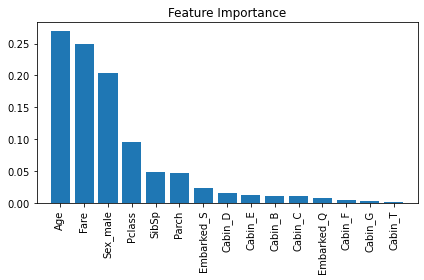

In [14]:
# Rankig the features with random forest
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_titanic.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train_std, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train_std.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train_std.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_std.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

The top 3 features may be enough to build a model. We may decide to include a few more features though.

## Selecting the features

In [15]:
# selecting the features threshold 
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, 
                      threshold=0.03, # specify threshold here to change number of features
                      prefit=True)
X_train_selected = sfm.transform(X_train_std)
X_test_selected = sfm.transform(X_test_std)

print('Number of features that meet this threshold criterion:', 
      X_train_selected.shape[1])

Number of features that meet this threshold criterion: 6


In [16]:
# viewing the selected features
for f in range(X_train_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Age                            0.269856
 2) Fare                           0.250145
 3) Sex_male                       0.203148
 4) Pclass                         0.094882
 5) SibSp                          0.049042
 6) Parch                          0.046710


## Training a first model with Ensemble

In [17]:
# Implementing the MajorityVoteClassiefier in sklearn

import numpy as np
from sklearn.preprocessing import StandardScaler

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# we train three different classifiers:

clf1 = LogisticRegression(penalty='l2',    # alternatives 'l1' ,'l2'
                          C=100,           # values from 0.001 to 100000 or higher
                          solver='lbfgs',  # alternatives: 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
                                           # for multi-class multi_class='multinominal' or'ovr'
                          random_state=1)

clf2 = DecisionTreeClassifier(max_depth=3,
                              criterion='entropy',
                              random_state=0)

 
clf3 = KNeighborsClassifier(n_neighbors=18,
                            p=2, #p=2=Euclidean distance, p=1=Manhatten distance
                            metric='minkowski')

clf4 = SVC(kernel='linear', 
          C=0.01, # ROC can be uped to 0.85 with C=1000 here
          random_state=1)

clf5 = SVC(kernel='rbf',  # radial base function
           random_state=1, 
           gamma=0.1, 
           C=0.001)  

clf6 = RandomForestClassifier(criterion='gini', # Gini impurity measure to split the nodes
                                n_estimators=25, # number of decision trees 25
                                random_state=1,
                                n_jobs=2) # using two cores of our computer (parallelizing the trainig)


pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])
pipe4 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf4]])
pipe5 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf5]])
pipe6 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf5]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN','SVM','kernel SVM','Random Forest']

# we evaluate the model perforamce of each classifier via 10-fold cross-validation
# on the training dataset:
print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3, pipe4, pipe5, pipe6], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train_selected,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.85 (+/- 0.06) [Logistic regression]
ROC AUC: 0.84 (+/- 0.06) [Decision tree]
ROC AUC: 0.87 (+/- 0.06) [KNN]
ROC AUC: 0.85 (+/- 0.06) [SVM]
ROC AUC: 0.85 (+/- 0.05) [kernel SVM]
ROC AUC: 0.85 (+/- 0.05) [Random Forest]


## Evaluating the outcome of the first model

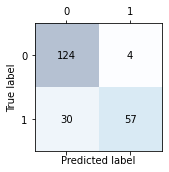

Test accuracy: 0.8418604651162791


In [18]:
# Producing a confusion matrix 

# defining and fitting the model again (it was in a loop before)
clf3 = KNeighborsClassifier(n_neighbors=18,
                            p=2, #p=2=Euclidean distance, p=1=Manhatten distance
                            metric='minkowski')
clf3.fit(X_train_selected, y_train)

from sklearn.metrics import confusion_matrix

# referencing the model
model = clf3

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#print(confmat)

# plotting the confusion matrix for easier interpretation
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()
# display test accuracy
print('Test accuracy:', model.score(X_test_selected, y_test))

Age is a very important feature.<br>
<br>
However, about 20% of the passengers in the training and test datasets have NaN as their age.<br>
We will build a separate training algorithm for the passengers in the two datasets without age.

Also, for one passenger in the test dataset there is no 'fare' value.<br>
We will address this one separately.

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Predicting the missing Age data

## Preparing the data

In [20]:
import pandas as pd

# reading the training and test data
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

# selecting the relevant columns
train = train[['PassengerId','Survived',"Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]]
test = test[['PassengerId',"Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]]

# setting 'PassengerId' as index
train = train.set_index('PassengerId')
test = test.set_index('PassengerId')

# encoding the feature labels of 'Sex'
train["Sex"] = [1 if x=="male" else 0 for x in train["Sex"]]
test["Sex"] = [1 if x=="male" else 0 for x in test["Sex"]]

# separating rows with and without 'age' in each dataset 
train_no_age = train[train["Age"].isnull()].drop("Age", 1)
train_age = train.dropna()
test_no_age = test[test["Age"].isnull()].drop("Age", 1)
test_age = test.dropna()


The test data contains one example that does not have a 'Fare' vale. We will assume that this was an employee and was therefore accomodated on the lower decks and thus did not survive.

In [21]:
# selecting the only person which has no fare or cabin
test_no_fare = test[test['Fare'].isnull()]
test_no_fare

,Pclass,Sex,SibSp,Parch,Fare,Age
PassengerId,,,,,,
1044,3,1,0,0,NaN,60.5


## Declaring the missing fare example for dead

In [22]:
# declare the passenger without 'Fare' for dead and creating a new df:
d = {'PassengerId':[1044],'Survived': [0]}

test_no_fare = pd.DataFrame(data=d)

test_no_fare = test_no_fare.set_index('PassengerId')
test_no_fare

,Survived
PassengerId,
1044,0


To get a better prediction on the age of the passengers we will combine the training with the test data.

In [23]:
# joining the two df
frames = [train_age, test_age]
age = pd.concat(frames)
len(age)

1045

We now have 1045 examples containing age

Traininging the model on all examples (from both datasets):

## Training the age predictor

In [24]:
# selecting the data
X = age.loc[:, 'Pclass':'Fare'].values
y = age.loc[:, 'Age'].values

# # encoding the class labels (good practice) (not needed here, since the class labels are already 0 and 1)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
       train_test_split(X, y, 
                        test_size=0.3, # this is very small to train on entire dataset
                        random_state=1)
                        #,stratify=y) # ensures that both training and test datasets have the same class proportions as the original dataset

# Standardization
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1) # -1 = using all the processors


# fitting the data
forest.fit(X_train_std, y_train)
y_train_pred = forest.predict(X_train_std)
y_test_pred = forest.predict(X_test_std)

# metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 66.889, test: 170.908
R^2 train: 0.660, test: 0.256


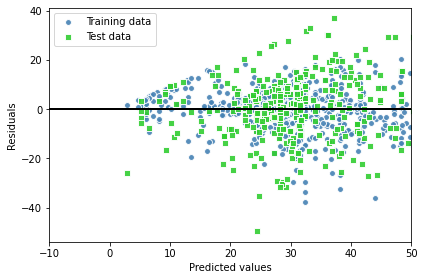

In [25]:
# plotting a residual plot

plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

#plt.savefig('images/10_15.png', dpi=300)
plt.show()

## Predicting the missing age data for the 'train' and 'test -datasets

In [26]:
# predicting the missing age in the train-dataset and in the test-dataset

# selecting the data
X_train = train_no_age.loc[:, 'Pclass':'Fare'].values
X_test = test_no_age.loc[:, 'Pclass':'Fare'].values

# transforming it
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

# making the prediction
age_train = forest.predict(X_train_std)
age_test = forest.predict(X_test_std)

In [27]:
# adding the age column back to the train/test datasets

# creating a new df for each dataset
train_age_trained = train_no_age
test_age_trained = test_no_age

# adding the column to the new dataset
train_age_trained['Age'] = age_train
test_age_trained['Age'] = age_test

In [28]:
test_age_trained

,Pclass,Sex,SibSp,Parch,Fare,Age
PassengerId,,,,,,
902,3,1,0,0,7.8958,26.844969
914,1,0,0,0,31.6833,26.063767
921,3,1,2,0,21.6792,24.533863
925,3,0,1,2,23.4500,29.518695
928,3,0,0,0,8.0500,24.147016
...,...,...,...,...,...,...
1300,3,0,0,0,7.7208,37.392641
1302,3,0,0,0,7.7500,22.374829
1305,3,1,0,0,8.0500,23.720309


In [29]:
# combining original examples from the train dataset with age with those that were predicted

frames_train = [train_age, train_age_trained]
frames_test = [test_age, test_age_trained]

titanic_train = pd.concat(frames_train)
titanic_test = pd.concat(frames_test)

# sorting by index
titanic_train.sort_index(inplace=True)
titanic_test.sort_index(inplace=True)

In [30]:
titanic_test

,Pclass,Sex,SibSp,Parch,Fare,Age
PassengerId,,,,,,
892,3,1,0,0,7.8292,34.500000
893,3,0,1,0,7.0000,47.000000
894,2,1,0,0,9.6875,62.000000
895,3,1,0,0,8.6625,27.000000
896,3,0,1,1,12.2875,22.000000
...,...,...,...,...,...,...
1305,3,1,0,0,8.0500,23.720309
1306,1,0,0,0,108.9000,39.000000
1307,3,1,0,0,7.2500,38.500000


# Training on part of the now completed train-dataset

In [31]:
# partition the dataset into separate test and training datasets randomly
from sklearn.model_selection import train_test_split

# assign Numpy array representation of feature columns to variable X and of class labels of first column to variable y
X, y = titanic_train.iloc[:, 1:].values, titanic_train.iloc[:, 0].values 

# splitting the data
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3,  # set to 0.3 for 30% of examples to test, 70% to train 
                     random_state=0, 
                     stratify=y) # ensuring that both test and training dataset have same class proportions as orignal dataset

In [32]:
# fitting the entire model with ensemble

# Implementing the MajorityVoteClassiefier in sklearn

import numpy as np
from sklearn.preprocessing import StandardScaler

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# we train three different classifiers:

clf1 = LogisticRegression(penalty='l2',    # alternatives 'l1' ,'l2'
                          C=100,           # values from 0.001 to 100000 or higher
                          solver='lbfgs',  # alternatives: 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
                                           # for multi-class multi_class='multinominal' or'ovr'
                          random_state=1)

clf2 = DecisionTreeClassifier(max_depth=3,
                              criterion='entropy',
                              random_state=0)

 
clf3 = KNeighborsClassifier(n_neighbors=4,
                            p=2, #p=2=Euclidean distance, p=1=Manhatten distance
                            metric='minkowski')

clf4 = SVC(kernel='linear', 
          C=0.01, # ROC can be uped to 0.85 with C=1000 here
          random_state=1)

clf5 = SVC(kernel='rbf',  # radial base function
           random_state=1, 
           gamma=0.1, 
           C=0.001)  

clf6 = RandomForestClassifier(criterion='gini', # Gini impurity measure to split the nodes
                                n_estimators=25, # number of decision trees 25
                                random_state=1,
                                n_jobs=2) # using two cores of our computer (parallelizing the trainig)


pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])
pipe4 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf4]])
pipe5 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf5]])
pipe6 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf5]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN','SVM','kernel SVM','Random Forest']

# we evaluate the model perforamce of each classifier via 10-fold cross-validation
# on the training dataset:
print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3, pipe4, pipe5, pipe6], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.85 (+/- 0.04) [Logistic regression]
ROC AUC: 0.85 (+/- 0.05) [Decision tree]
ROC AUC: 0.84 (+/- 0.05) [KNN]
ROC AUC: 0.85 (+/- 0.04) [SVM]
ROC AUC: 0.85 (+/- 0.05) [kernel SVM]
ROC AUC: 0.85 (+/- 0.05) [Random Forest]


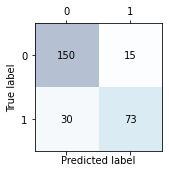

Test accuracy: 0.832089552238806


In [33]:
# selecting a model of the ones above
model = clf2

# fitting the model
model.fit(X_train, y_train)

# Evaluating with a confusion matrix and measuring test accuracy

from sklearn.metrics import confusion_matrix

#lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#print(confmat)

# plotting the confusion matrix for easier interpretation
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()
# display test accuracy
print('Test accuracy:', model.score(X_test, y_test))

# Training the model on the entire train-dataset

In [34]:
# splitting the data
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.01,  
                     random_state=0) # ensuring that both test and training dataset have same class proportions as orignal dataset

# fitting the model to all the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Making predictions for test data

In [35]:
titanic_test

,Pclass,Sex,SibSp,Parch,Fare,Age
PassengerId,,,,,,
892,3,1,0,0,7.8292,34.500000
893,3,0,1,0,7.0000,47.000000
894,2,1,0,0,9.6875,62.000000
895,3,1,0,0,8.6625,27.000000
896,3,0,1,1,12.2875,22.000000
...,...,...,...,...,...,...
1305,3,1,0,0,8.0500,23.720309
1306,1,0,0,0,108.9000,39.000000
1307,3,1,0,0,7.2500,38.500000


In [36]:
# using the previously established model to predict the age

# assign Numpy array representation of feature columns to variable X and of class labels of first column to variable y
X = titanic_test.iloc[:,:].values

# making the predictions
y_pred = model.predict(X)

In [37]:
# creating a new df for the result
titanic_result = titanic_test

# adding the predictions
titanic_result['Survived'] = y_pred

# adding the example with 'no fare' 
frames = [titanic_result, test_no_fare]
result = pd.concat(frames)

# sorting by index
result.sort_index(inplace=True)

# preparing for submission
submission = result['Survived']
submission.to_csv("submission.csv")

submitted :)

Score: 0.78468

In [38]:
submission.head(30)

PassengerId
892    0
893    1
894    0
895    0
896    1
897    0
898    1
899    0
900    1
901    0
902    0
903    0
904    1
905    0
906    1
907    1
908    0
909    0
910    1
911    1
912    0
913    1
914    1
915    0
916    1
917    0
918    1
919    0
920    0
921    0
Name: Survived, dtype: int64